In [2]:
import sys
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

In [3]:
# ÎìúÎùºÏù¥Î≤Ñ ÏòµÏÖò ÏÑ§Ï†ï
chrom_options = webdriver.ChromeOptions()
chrom_options.add_experimental_option('detach', True)
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrom_options)

In [4]:
# Î∏åÎùºÏö∞Ï†Ä ÎùÑÏö∞Í∏∞
driver.get('https://www.instagram.com/')
driver.implicitly_wait(2)

In [5]:
# Î°úÍ∑∏Ïù∏ ÏÑ§Ï†ï
login_id = 'sumaoo20@naver.com'
login_pw = '###'

In [6]:
# Î°úÍ∑∏Ïù∏
# driver.find_element(By.XPATH, '//*[@id="loginForm"]/div/div[1]/div/label/input').send_keys(login_id)
# driver.find_element(By.XPATH, '//*[@id="loginForm"]/div/div[2]/div/label/input').send_keys(login_pw)
# time.sleep(2)

## Î°úÍ∑∏Ïù∏ Îã§Î•∏ Î∞©Î≤ï
driver.find_elements(By.CSS_SELECTOR, "._aa4b._add6._ac4d")[0].send_keys(login_id)
driver.find_elements(By.CSS_SELECTOR, "._aa4b._add6._ac4d")[1].send_keys(login_pw)


In [7]:
# driver.find_element(By.XPATH, '//*[@id="loginForm"]/div/div[3]').click()
driver.find_element(By.CSS_SELECTOR, '._acan._acap._acas._aj1-').click()

driver.implicitly_wait(3)
time.sleep(3)

In [8]:
# Í≤ÄÏÉâ ÏÑ§Ï†ï Î∞è Í≤ÄÏÉâ
keyword = 'ÌÖåÏù¥ÌçºÎìúÌïè'
driver.get(f'https://www.instagram.com/explore/tags/{keyword}/')
driver.implicitly_wait(5)
time.sleep(5)

In [24]:
a = driver.find_elements(By.CSS_SELECTOR, 'div._aagw')
a[0].click()
time.sleep(2)
# Ìè¨Ïä§Ìä∏ Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
time.sleep(2)
print('Ìè¨Ïä§Ìä∏ Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞ ÏôÑÎ£å')

# id Ï†ïÎ≥¥ ÏñªÍ∏∞
id = soup.select('div')[1]['id']
print(id)

# xpath Î≥ÄÌôò Ìï®Ïàò ÏÑ§Ï†ï
def XPATH_id_changer(id, s):
    # s Îäî Î∞îÍøÄ Ï£ºÏÜå, id Îäî id Ï†ïÎ≥¥
    locate = s.find('id=') + 4
    return s[:locate] + id + s[locate + len(id):]

# ÎåìÍ∏Ä ÏàòÏßë Ìï®Ïàò
def comment_scraping():
    # ÎåìÍ∏Ä ÏöîÏÜå Í≤ÄÏÉâ
    ul_list = soup.find_all('ul', class_='_a9ym')

    comments_list = []
    for i in ul_list:
        temp_list = i.find_all('div', class_='_a9zs')  # find_allÎ°ú Î≥ÄÍ≤Ω
        for temp in temp_list:
            text = temp.find('span')
            if text:
                try:
                    text.find('a').decompose()
                except:
                    pass
                comment_text = text.get_text().strip()
                if 'https://' not in comment_text:
                    comments_list.append(comment_text)
    return comments_list
import re
hashtag_regex = "#([0-9a-zA-ZÍ∞Ä-Ìû£]*)"

# Ìï¥ÏãúÌÉúÍ∑∏ ÏàòÏßë Ìï®Ïàò ÏÑ§Ï†ï
def hashtag_scraping():
    ul_list = soup.find_all('div', class_='_a9zr')
    
    hashtag_list = []
    for i in ul_list:
        hashtags = i.find('div', class_='_a9zs')
        if hashtags:
            a_atags = hashtags.find_all('a', class_='x1i10hfl')
            for a_tag in a_atags:
                hashtag_text = a_tag.get_text()
                match = re.match(hashtag_regex, hashtag_text)
                if match:
                    extracted_hashtag = match.group(1)
                    if any(char.isalpha() for char in extracted_hashtag):
                        hashtag_list.append(extracted_hashtag)
    return hashtag_list

all_hashtags = []
all_comments = []

post_count = 100
for i in range(post_count - 1):
    try:
        if i == 0:
            driver.find_element(By.XPATH, XPATH_id_changer(id, '//*[@id="mount_0_0_om"]/div/div/div[3]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div/button')).click()
        else:
            driver.find_element(By.XPATH, XPATH_id_changer(id, '//*[@id="mount_0_0_om"]/div/div/div[3]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div[2]/button')).click()
    except:
        break
    time.sleep(1)
    # ÌòÑÏû¨ ÌéòÏù¥ÏßÄ Ï†ïÎ≥¥ ÏàòÏßë
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # Ìï¥Ïâ¨ÌÉúÍ∑∏ Ïä§ÌÅ¨ÎûòÌïë
    hashtags = hashtag_scraping()
    all_hashtags.extend(hashtags)
    comments = comment_scraping()
    all_comments.extend(comments)

print('Total hashtag count:', len(all_hashtags))
print("All hashtags:", all_hashtags)
print("comments:", all_comments)

Ìè¨Ïä§Ìä∏ Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞ ÏôÑÎ£å
mount_0_0_Ve
Total hashtag count: 1075
All hashtags: ['Îç∞ÎãòÌå¨Ï∏†', 'DENIM', 'Îç∞ÎãòÏßÑ', 'Î∏îÎûôÏßÑ', 'ÏôÄÏù¥ÎìúÌïè', 'Î†àÍ∑§Îü¨Ìïè', 'Ïä¨Î¶ºÌïè', 'Ïä§Ìä∏Î†àÏù¥Ìä∏Ìïè', 'ÌÖåÏù¥ÌçºÎìúÌïè', 'Î¨¥Ïã†ÏÇ¨', 'Î¨¥Ïã†ÏÇ¨Îß§Í±∞ÏßÑ', 'MUSINSA', 'Î†àÏä§', 'RES', 'Î†àÏä§', 'Î†àÏä§Ïò¥ÎØÄ', 'ÌÖåÏù¥ÌçºÎìúÌïè', 'Ï≤≠Î∞îÏßÄÏΩîÎîî', 'ÎπÖÏÇ¨Ïù¥Ï¶àÏ≤≠Î∞îÏßÄ', 'Îç∞ÏùºÎ¶¨ÏΩîÎîî', 'Í∞ÄÏùÑÏΩîÎîî', 'ÎÇ®ÏπúÏΩîÎîî', 'ÎÇ®ÏûêÏò∑ÏΩîÎîî', 'ÏûêÏ≤¥Ï†úÏûë', 'ÏàòÏûÖÏùòÎ•ò', 'ÎÇ®ÏûêÏò∑', 'minimalfit', 'minimalfashion', 'Îç∞ÏùºÎ¶¨Î£©', 'ÎÇ®ÏûêÎç∞ÏùºÎ¶¨Î£©', 'ÎÇ®ÏûêÏΩîÎîî', 'ÎÇ®ÏûêÎ¥ÑÏΩîÎîî', 'ÎÇ®ÏûêÏûêÏºì', 'ÏôÅÏä§ÏûêÏºì', 'Î†àÎçîÏûêÏºì', 'ÌÖåÏù¥ÌçºÎìúÌïè', 'ÎØ∏ÎãàÎ©ÄÎ£©', 'Ïã†Í∑úÏóÖÏ≤¥', 'ÏÇ¨Ïû•ÎãòÎì§', 'ÎãπÎãπÌïòÍ≤å', 'ÏÉòÌîåÏöîÏ≤≠Ï£ºÏÑ∏Ïöî', 'ÏãúÎ¶¨Ï¶à', 'ÌÖåÏù¥ÌçºÎìúÌïè', '5Ïª¨Îü¨Îç∞Îãò', 'Îç∞ÏùºÎ¶¨Î£©', 'ÏπòÎÖ∏Ìå¨Ï∏†', 'ÌÖåÏù¥ÌçºÎìúÌïè', 'Î©¥Î∞îÏßÄ', 'ÏïÑÎ©îÏπ¥ÏßÄ', 'ÏõåÌÅ¨Ïõ®Ïñ¥', 'Í¥ëÎ™ÖÎèôÍµ¥', 'ÏôÄÏù∏ÎèôÍµ¥', 'ÎèôÍµ¥', 'cave', 'ootd', 'Ïò§Ïò§Ìã∞Îîî', 'Ïó¨Î¶ÑÏΩîÎîî', 'Ïó¨ÏûêÏΩ

In [10]:
import csv

csv_file_name = f"{keyword}.csv"

with open(csv_file_name, 'w', newline='', encoding='utf-8-sig') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # Ìó§Îçî ÏûëÏÑ±
    csvwriter.writerow(['hashtag'])
    
    for hashtag in all_hashtags:
        csvwriter.writerow([hashtag])
        
print(f"Total {len(all_hashtags)} hashtags have been written to {csv_file_name}")

Total 1154 hashtags have been written to Î†àÍ∑§Îü¨Ìïè.csv


In [25]:
# comments csv
import csv
csv_file_name = f"{keyword}comments.csv"

with open(csv_file_name, 'w', newline='', encoding='utf-8-sig') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # Ìó§Îçî ÏûëÏÑ±
    csvwriter.writerow(['comments'])
    
    for comments in all_comments:
        csvwriter.writerow([comments])
print(f"Total {len(all_comments)} hashtags have been written to {csv_file_name}")

Total 469 hashtags have been written to ÌÖåÏù¥ÌçºÎìúÌïècomments.csv


In [26]:
import pandas as pd

# Ìï©Ïπ† CSV ÌååÏùºÎì§Ïùò Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
csv_files = ["Î†àÍ∑§Îü¨Ìïècomments.csv", "ÏÑ∏ÎØ∏Ïò§Î≤ÑÌïècomments.csv", "Ïä¨Î¶ºÌïècomments.csv", "Ïò§Î≤ÑÌïècomments.csv", "ÏôÄÏù¥ÎìúÌïècomments.csv", "ÌÖåÏù¥ÌçºÎìúÌïècomments.csv",]

# CSV ÌååÏùºÎì§ÏùÑ DataFrameÏúºÎ°ú ÏùΩÍ∏∞
dataframes = [pd.read_csv(csv_file) for csv_file in csv_files]

# DataFrameÎì§ÏùÑ ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
merged_dataframe = pd.concat(dataframes, ignore_index=True)

# ÏÉàÎ°úÏö¥ CSV ÌååÏùºÎ°ú Ï†ÄÏû•
merged_csv_filename = "comments-merged.csv"

merged_dataframe.to_csv(merged_csv_filename, index=False, encoding='utf-8-sig')

print(f"Merged CSV file has been created: {merged_csv_filename}")

Merged CSV file has been created: comments-merged.csv


In [16]:
# Ìè∞Ìä∏ Í≤ΩÎ°ú ÌôïÏù∏
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
[f for f in sys_font if 'Nanum' in f]

[]

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd


# CSV ÌååÏùº ÏùΩÍ∏∞
csv_filename = "musinsa.csv"
data = pd.read_csv(csv_filename)

# mask
mask_path = "heart.png"
mask = np.array(Image.open(mask_path))

# Î™®Îì† ÌÖçÏä§Ìä∏ Ìï©ÏπòÍ∏∞
all_text = ' '.join(data['Í∏∞Î≥∏Ìã∞'])



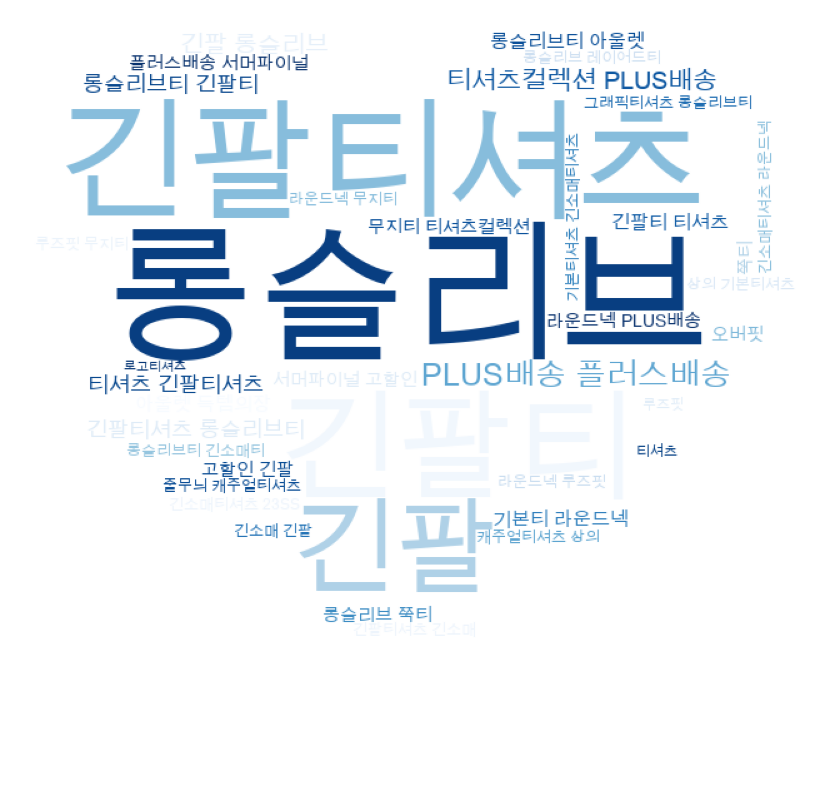

In [4]:

font_path = "/Library/Fonts/Arial Unicode.ttf"

# ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      font_path=font_path,
                      colormap='Blues',
                      mask= mask,
                      min_font_size=10).generate(all_text)

# ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú Ï†ÄÏû• (ÏÑ†ÌÉùÏÇ¨Ìï≠)
output_filename = "wordcloud.png"
plt.savefig(output_filename)

plt.show()

In [16]:
# tf Í∞í Íµ¨ÌòÑ
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# CSV ÌååÏùº ÏùΩÍ∏∞
csv_filename = "merged.csv"
data = pd.read_csv(csv_filename)

# Î™®Îì† Ìï¥ÏãúÌÉúÍ∑∏ ÌÖçÏä§Ìä∏ Ìï©ÏπòÍ∏∞
csv_filename = "merged.csv"
data = pd.read_csv(csv_filename)

# Î™®Îì† Ìï¥ÏãúÌÉúÍ∑∏ ÌÖçÏä§Ìä∏ Ìï©ÏπòÍ∏∞
all_hashtags = data['hashtag'].str.replace('#', '').str.lower().str.replace(r'[^\w\s]', '').str.split()
# print(all_hashtags)

# Ìï¥ÏãúÌÉúÍ∑∏ Î¶¨Ïä§Ìä∏Î•º Í≥µÎ∞±ÏúºÎ°ú Ïó∞Í≤∞ÌïòÏó¨ Î¨∏ÏÑú ÌòïÌÉúÎ°ú Î≥ÄÌôò
documents = [" ".join(hashtags) for hashtags in all_hashtags]

# TF Î≥ÄÌôò
tf_vectorizer = CountVectorizer()
tf_matrix = tf_vectorizer.fit_transform(documents)

# TF Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
tf_df = pd.DataFrame(tf_matrix.toarray(), columns=tf_vectorizer.get_feature_names_out())

# Í∞Å Ìï¥ÏãúÌÉúÍ∑∏Ïùò Ï¥ù ÌöüÏàò Í≥ÑÏÇ∞
hashtag_counts = tf_df.sum()

# TF Í∞íÏù¥ ÎÜíÏùÄ ÏàúÏÑúÎ°ú Ï†ïÎ†¨
sorted_hashtag_counts = hashtag_counts.sort_values(ascending=False)

# Ï†ïÎ†¨Îêú Ïª¨ÎüºÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ïû¨Íµ¨ÏÑ±
sorted_tf_df = tf_df[sorted_hashtag_counts.index]

print(sorted_hashtag_counts)

# Í≤∞Í≥ºÎ•º ÏóëÏÖÄ ÌååÏùºÎ°ú Ï†ÄÏû•
output_excel_filename = "sorted_tf_counts_results.xlsx"
sorted_tf_df.to_excel(output_excel_filename, index=False)


ModuleNotFoundError: No module named 'sklearn'

In [51]:
# idf Í∞í Íµ¨ÌòÑ
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# CSV ÌååÏùº ÏùΩÍ∏∞
csv_filename = "merged.csv"
data = pd.read_csv(csv_filename)

# Î™®Îì† Ìï¥ÏãúÌÉúÍ∑∏ ÌÖçÏä§Ìä∏ Ìï©ÏπòÍ∏∞
all_hashtags = data['hashtag'].str.replace('#', '').str.lower().str.replace(r'[^\w\s]', '').str.split()

# Ìï¥ÏãúÌÉúÍ∑∏ Î¶¨Ïä§Ìä∏Î•º Í≥µÎ∞±ÏúºÎ°ú Ïó∞Í≤∞ÌïòÏó¨ Î¨∏ÏÑú ÌòïÌÉúÎ°ú Î≥ÄÌôò
documents = [" ".join(hashtags) for hashtags in all_hashtags]

# TF-IDF Î≥ÄÌôò
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# TF-IDF Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# IDF Í∞í Ï∂îÏ∂ú
idf_values = tfidf_vectorizer.idf_

# Í∞Å Îã®Ïñ¥Î≥Ñ IDF Í∞í ÌôïÏù∏
idf_df = pd.DataFrame({"Word": tfidf_vectorizer.get_feature_names_out(), "IDF": idf_values})
print(idf_df)


         Word       IDF
0       10ÎåÄÏΩîÎîî  6.779199
1       20ÎåÄÏΩîÎîî  6.779199
2       541Ìå¨Ï∏†  6.779199
3       9Î∂ÄÏä¨ÎûôÏä§  6.779199
4    adidasy3  6.779199
..        ...       ...
482        ÌõÑÎîî  6.779199
483        ÌõàÎÇ®  6.779199
484      ÌûàÎì†Î∞¥Îî©  6.779199
485        ÌûêÎßÅ  6.373734
486       ÌûôÏö¥Îèô  6.779199

[487 rows x 2 columns]


In [1]:
import pandas as pd
merged_df = pd.read_csv('newcomments-merged.csv',encoding='utf-8') # labelÏùÄ ÏòÅÌôîÏóê ÎåÄÌïú Í∏çÏ†ïÌèâÍ∞ÄÎäî 1, Î∂ÄÏ†ïÌèâÍ∞ÄÎäî 0
merged_df.head()

merged_df['clean-comments'] = merged_df['comments'].str.replace("[^„Ñ±-„Ö£Í∞Ä-Ìû£a-zA-Z]", " ")
merged_df.head(10)



comments  label    clean-comments
0                 üî•      1                 üî•
1                 üëè      1                 üëè
2         ÏûêÏºìÏ†ïÎ≥¥ÏïåÏàòÏûàÎÇòÏöî      0         ÏûêÏºìÏ†ïÎ≥¥ÏïåÏàòÏûàÎÇòÏöî
3    Ìó§Ïñ¥ Í≥±Ï∞Ω Ï†ïÎ≥¥ ÏïåÍ≥†Ïã∂Ïñ¥Ïöî      0    Ìó§Ïñ¥ Í≥±Ï∞Ω Ï†ïÎ≥¥ ÏïåÍ≥†Ïã∂Ïñ¥Ïöî
4          Ïñ∏Ï†úÏóÖÎéÉÎêòÏöî??      0          Ïñ∏Ï†úÏóÖÎéÉÎêòÏöî??
5       Î∞îÏßÄ Ïù¥Î¶ÑÏù¥ Î≠îÍ∞ÄÏö©!      0       Î∞îÏßÄ Ïù¥Î¶ÑÏù¥ Î≠îÍ∞ÄÏö©!
6  Î°úÍ≥†Ìè¨Ïù∏Ìä∏ ÏôÑÏ†Ñ Î©ãÏßÄÏã†Í±∏ÏöîüòÆüî•      1  Î°úÍ≥†Ìè¨Ïù∏Ìä∏ ÏôÑÏ†Ñ Î©ãÏßÄÏã†Í±∏ÏöîüòÆüî•
7     Ï∫êÏ£ºÏñºÌïú ÏΩîÎîî ÏòàÏÅòÎÑ§Ïö©üëè      1     Ï∫êÏ£ºÏñºÌïú ÏΩîÎîî ÏòàÏÅòÎÑ§Ïö©üëè
8     Ïò§ÎäòÏùÄ Îπ®Î¶¨ Ìá¥Í∑ºÌïòÎäîÎÇ†„Öé      1     Ïò§ÎäòÏùÄ Îπ®Î¶¨ Ìá¥Í∑ºÌïòÎäîÎÇ†„Öé
9    Ïù¥Î≤àÏóêÎèÑ Ï°∞Ïã¨Ìûà ÎÑòÏñ¥Í∞ÄÍ∏∏üò¢      0    Ïù¥Î≤àÏóêÎèÑ Ï°∞Ïã¨Ìûà ÎÑòÏñ¥Í∞ÄÍ∏∏üò¢

In [1]:
import pandas as pd

input_filename = 'comments-merged.csv'
output_filename = 'newcomments-merged.csv'

# CSV ÌååÏùºÏùÑ DataFrameÏúºÎ°ú ÏùΩÏñ¥Ïò¥
data = pd.read_csv(input_filename)

# ÏÉàÎ°úÏö¥ Î†àÏù¥Î∏î Îç∞Ïù¥ÌÑ∞
new_label = 1

# ÏÉàÎ°úÏö¥ Î†àÏù¥Î∏îÏùÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
data['label'] = new_label

# ÏàòÏ†ïÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÏÉà ÌååÏùºÎ°ú Ï†ÄÏû•
data.to_csv(output_filename, index=False)

print(f'"{output_filename}" ÌååÏùºÏù¥ ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.')


"newcomments-merged.csv" ÌååÏùºÏù¥ ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.


In [40]:
merged_df.isnull().sum()

comments          0
clean-comments    0
dtype: int64

In [2]:
print(merged_df)



                               comments  label  \
0                                     üî•      1   
1                                     üëè      1   
2                             ÏûêÏºìÏ†ïÎ≥¥ÏïåÏàòÏûàÎÇòÏöî      0   
3                        Ìó§Ïñ¥ Í≥±Ï∞Ω Ï†ïÎ≥¥ ÏïåÍ≥†Ïã∂Ïñ¥Ïöî      0   
4                              Ïñ∏Ï†úÏóÖÎéÉÎêòÏöî??      0   
...                                 ...    ...   
1424  Ïó≠Ïãú Ïò§ÎäòÎèÑ ÍπîÎÅîÌïú ÏÑºÏä§ÏûàÎäîÏΩîÎîîÎÑ§Ïöîü§©üëç 5ÏõîÎèÑ ÌôîÏù¥ÌåÖÏûÖÎãàÎã∑üî•      1   
1425                       5ÏõîÎèÑ ÌôîÏù¥ÌåÖÏûÖÎãàÎã§üôåüôå      1   
1426                   ÏúÑÌä∏ÏûàÎäî Ï∫êÏ£ºÏñº ÏΩîÎîî Ï¢ãÎÑ§Ïöîüî•      1   
1427           ÏΩîÌäº Î∏îÎ†àÏù¥Ï†ÄÏóê Ï≤¥ÌÅ¨ÏÖîÏ∏† ÏïÑÏ£º ÎßõÏûáÎäî ÏΩîÎîîüî•      1   
1428                              label      1   

                         clean-comments  
0                                     üî•  
1                                     üëè  
2                             ÏûêÏºìÏ†ïÎ≥¥ÏïåÏàòÏûàÎÇòÏöî  
3   

In [3]:
merged_df.reset_index(inplace=True)
merged_df.head()

index        comments  label  clean-comments
0      0               üî•      1               üî•
1      1               üëè      1               üëè
2      2       ÏûêÏºìÏ†ïÎ≥¥ÏïåÏàòÏûàÎÇòÏöî      0       ÏûêÏºìÏ†ïÎ≥¥ÏïåÏàòÏûàÎÇòÏöî
3      3  Ìó§Ïñ¥ Í≥±Ï∞Ω Ï†ïÎ≥¥ ÏïåÍ≥†Ïã∂Ïñ¥Ïöî      0  Ìó§Ïñ¥ Í≥±Ï∞Ω Ï†ïÎ≥¥ ÏïåÍ≥†Ïã∂Ïñ¥Ïöî
4      4        Ïñ∏Ï†úÏóÖÎéÉÎêòÏöî??      0        Ïñ∏Ï†úÏóÖÎéÉÎêòÏöî??

In [3]:
k_stopword = pd.read_csv('./korean_stopword.csv')
k_stopword

Î∂àÏö©Ïñ¥
0     Ïù¥
1     Ïûà
2     Ìïò
3     Í≤É
4     Îì§
..   ..
134   Î£®
135   Ïöî
136   Î°ú
137   ÏôÄ
138   Î¶¨

[139 rows x 1 columns]

In [4]:
stopwords = list(k_stopword['Î∂àÏö©Ïñ¥'])
stopwords = stopwords + ['ÏïÑÎãà','ÎÇú','ÏßëÏóê','Í∞ÄÍ≥†']
stopwords[-10:]

['Î¶¨Í∞Ä', 'Î£®', 'Ïöî', 'Î°ú', 'ÏôÄ', 'Î¶¨', 'ÏïÑÎãà', 'ÎÇú', 'ÏßëÏóê', 'Í∞ÄÍ≥†']

In [5]:
from konlpy.tag import Okt
okt = Okt()
morphs_lst = []
for i in merged_df.index:
    morphs = []
    morph = okt.morphs(merged_df.loc[i]['clean-comments'])
    for txt in morph:
        if txt not in stopwords and len(txt) > 1:
            morphs.append(txt)
    morphs_lst.append(morphs)
merged_df['morphs'] = morphs_lst
merged_df.head()

comments  label  clean-comments               morphs
0               üî•      1               üî•                   []
1               üëè      1               üëè                   []
2       ÏûêÏºìÏ†ïÎ≥¥ÏïåÏàòÏûàÎÇòÏöî      0       ÏûêÏºìÏ†ïÎ≥¥ÏïåÏàòÏûàÎÇòÏöî      [ÏûêÏºì, Ï†ïÎ≥¥, ÏïåÏàòÏûàÎÇòÏöî]
3  Ìó§Ïñ¥ Í≥±Ï∞Ω Ï†ïÎ≥¥ ÏïåÍ≥†Ïã∂Ïñ¥Ïöî      0  Ìó§Ïñ¥ Í≥±Ï∞Ω Ï†ïÎ≥¥ ÏïåÍ≥†Ïã∂Ïñ¥Ïöî  [Ìó§Ïñ¥, Í≥±Ï∞Ω, Ï†ïÎ≥¥, ÏïåÍ≥†Ïã∂Ïñ¥Ïöî]
4        Ïñ∏Ï†úÏóÖÎéÉÎêòÏöî??      0        Ïñ∏Ï†úÏóÖÎéÉÎêòÏöî??         [ÏóÖÎéÉ, ÎêòÏöî, ??]

In [6]:
tokenized_doc = merged_df['morphs']
tokenized_doc[:5]

0                     []
1                     []
2        [ÏûêÏºì, Ï†ïÎ≥¥, ÏïåÏàòÏûàÎÇòÏöî]
3    [Ìó§Ïñ¥, Í≥±Ï∞Ω, Ï†ïÎ≥¥, ÏïåÍ≥†Ïã∂Ïñ¥Ïöî]
4           [ÏóÖÎéÉ, ÎêòÏöî, ??]
Name: morphs, dtype: object

In [7]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)

# ÏÉòÌîå Ï∂úÎ†•
print(tokenized_doc[0])
dictionary.doc2bow(tokenized_doc[0])  # (word_id, word_frequency)

corpus = []
for text in tokenized_doc:
    corpus.append(dictionary.doc2bow(text))
corpus 

[]


[[],
 [],
 [(0, 1), (1, 1), (2, 1)],
 [(2, 1), (3, 1), (4, 1), (5, 1)],
 [(6, 1), (7, 1), (8, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(12, 1), (13, 1), (14, 1), (15, 1), (16, 1)],
 [(17, 1), (18, 1), (19, 1)],
 [(20, 1), (21, 1), (22, 1), (23, 1)],
 [(24, 1), (25, 1), (26, 1), (27, 1)],
 [(27, 1), (28, 1)],
 [(29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)],
 [(12, 1), (15, 1), (35, 1)],
 [(36, 1), (37, 1), (38, 1), (39, 1)],
 [(40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 2),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 2),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1)],
 [(79, 1)],
 [(80, 1), (81, 1)],
 [(82, 1)],
 [(83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91,

In [8]:
import gensim
NUM_TOPICS = 20 #20Í∞úÏùò ÌÜ†ÌîΩ, k=20   # ÌïòÎã®Ïùò Í∑∏Î¶ºÏóê ÎèôÍ∑∏ÎùºÎØ∏ 20Í∞úÍ∞Ä ÏÉùÏÑ±Îê®
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.136*"‚ù§Ô∏è" + 0.010*"ÎÖ∏Îûë" + 0.008*"ÏΩîÎîî" + 0.006*"Ïä§ÌÉÄ"')
(1, '0.024*"ÎÑàÎ¨¥" + 0.019*"ÏΩîÎîî" + 0.019*"!!" + 0.019*"ÏòàÎªêÏöî"')
(2, '0.025*"Ïª¨Îü¨" + 0.016*"ÎÑàÎ¨¥" + 0.014*",," + 0.014*"Í∞ôÏïÑÏöî"')
(3, '0.016*"!!" + 0.011*"ÏôÑÏ†Ñ" + 0.011*"üôåüôå" + 0.011*"Wow"')
(4, '0.012*"Ïó¨Î¶Ñ" + 0.011*"ÏΩîÎîî" + 0.009*"ÎäêÎÇå" + 0.008*"ÎÑàÎ¨¥"')
(5, '0.038*"ÎÑàÎ¨¥" + 0.027*"üî•üî•" + 0.021*"ÏΩîÎîî" + 0.011*"ÏòàÏÅú"')
(6, '0.025*"ÎÑàÎ¨¥" + 0.015*"ÏòàÏÅòÎÑ§Ïöî" + 0.013*"ÎäêÎÇå" + 0.013*"üî•üî•"')
(7, '0.027*"üî•üî•üî•" + 0.022*"üòçüòç" + 0.016*"ÍπîÎÅîÌïú" + 0.014*"ÏΩîÎîî"')
(8, '0.016*"Ïù¥Îã§" + 0.015*"ÎÑàÎ¨¥" + 0.010*"Î∞îÏßÄ" + 0.008*"ÎçîÏö±"')
(9, '0.016*".." + 0.014*"Ïñ¥Ïö∏Î¶¨ÏÑ∏Ïöî" + 0.014*"ÎÑàÎ¨¥" + 0.014*"Î®∏Ïä§ÌÉÄÎìú"')
(10, '0.026*"!!" + 0.015*"ÎÑàÎ¨¥" + 0.012*"ÏßÑÏßú" + 0.011*"Í∑ÄÏó¨Ïö¥"')
(11, '0.032*"ÎÑàÎ¨¥" + 0.030*"ÏÖîÏ∏†" + 0.023*"!!" + 0.009*"Í∞ëÎãàÎã§"')
(12, '0.012*"ÏΩîÎîî" + 0.008*"ÏúºÎ°ú" + 0.008*"~~" + 0.008*"it"')
(13, '0.055*"Ìå¨Ï∏†" + 0.038*"ÏÉâ

In [9]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary,sort_topics=False)
pyLDAvis.save_html(vis, 'lda.html')

In [10]:
pyLDAvis.display(vis)

In [12]:
neg=merged_df[merged_df['label']==0]   ## 0Í∞íÎßå  negÎ≥ÄÏàòÎ°ú
tokenized_doc = neg['morphs']   # neg
dictionary = corpora.Dictionary(tokenized_doc)
corpus = []
for text in tokenized_doc:
    corpus.append(dictionary.doc2bow(text))

NUM_TOPICS = 10 #20Í∞úÏùò ÌÜ†ÌîΩ, k=20   # ÌïòÎã®Ïùò Í∑∏Î¶ºÏóê ÎèôÍ∑∏ÎùºÎØ∏ 20Í∞úÍ∞Ä ÏÉùÏÑ±Îê®
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)
    
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary,sort_topics=False)
pyLDAvis.save_html(vis, 'lda_neg.html')    # lda_neg.html
pyLDAvis.display(vis)

(0, '0.102*"Ï†ïÎ≥¥" + 0.102*"Í≥±Ï∞Ω" + 0.102*"ÏïåÍ≥†Ïã∂Ïñ¥Ïöî" + 0.102*"Ìó§Ïñ¥"')
(1, '0.015*".." + 0.015*"..." + 0.015*"ÏôÄÎìú" + 0.015*"Ïã´ÏùÄÎç∞"')
(2, '0.068*"..." + 0.068*".." + 0.046*"Î≤ÑÌîº" + 0.046*"Ïã´ÏùÄÎç∞"')
(3, '0.125*"Ï†ïÏÉÅ" + 0.125*"Î≥¥Í∏∞" + 0.125*"ÏâΩÏßÄ" + 0.125*"ÏïäÎÑ§"')
(4, '0.074*"??" + 0.074*"ÏóÖÎéÉ" + 0.074*"Í∑∏Îü¥ÏàòÎèÑ" + 0.074*"ÏûàÍ≤†Ïñ¥Ïöî"')
(5, '0.112*"Í∞ÄÍ≤©" + 0.112*"Î¨∏Ïùò" + 0.112*"ÌÉÄÏù¥Ìëº" + 0.010*"Îú¨Í±∞Í∞Ä"')
(6, '0.102*"ÏïåÎ†§Ï£ºÏÑ∏Ïöî" + 0.102*"Ïù¥Îã§" + 0.102*"Ïö∞ÏïÑ" + 0.102*"Í∞ÄÍ≤©"')
(7, '0.133*"„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã" + 0.133*"ÎÇòÏò§ÎÑ§" + 0.070*"Ïù¥Î¶Ñ" + 0.070*"Î∞îÏßÄ"')
(8, '0.102*"Ï°∞Ïã¨" + 0.102*"ÎÑòÏñ¥Í∞ÄÍ∏∏" + 0.102*"Ïù¥Î≤à" + 0.102*"ÏóêÎèÑ"')
(9, '0.102*"ÏóÜÎÇòÏöî" + 0.102*"Îß§Ïû•" + 0.102*"Îî∞Î°ú" + 0.102*"Îú¨Í±∞Í∞Ä"')


In [13]:
pos=merged_df[merged_df['label']==1]   ## 1Í∞íÎßå  posÎ≥ÄÏàòÎ°ú
tokenized_doc = pos['morphs']    # pos
dictionary = corpora.Dictionary(tokenized_doc)
corpus = []
for text in tokenized_doc:
    corpus.append(dictionary.doc2bow(text))

NUM_TOPICS = 20 #20Í∞úÏùò ÌÜ†ÌîΩ, k=20   # ÌïòÎã®Ïùò Í∑∏Î¶ºÏóê ÎèôÍ∑∏ÎùºÎØ∏ 20Í∞úÍ∞Ä ÏÉùÏÑ±Îê®
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)
    
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary,sort_topics=False)
pyLDAvis.save_html(vis, 'lda_pos.html') 

(0, '0.020*"ÎÑàÎ¨¥" + 0.011*",," + 0.011*"Ï†ïÎßê" + 0.010*"ÏÉÅÏùò"')
(1, '0.020*".." + 0.014*"Í∑∏Î¶∞" + 0.011*"ÏΩîÎîî" + 0.010*"üôåüôå"')
(2, '0.108*"‚ù§Ô∏è" + 0.016*"üòçüòç" + 0.015*".." + 0.013*"ÏΩîÎîî"')
(3, '0.011*"you" + 0.011*"!!" + 0.011*"Î®∏Ïä§ÌÉÄÎìú" + 0.009*"ÎÑàÎ¨¥"')
(4, '0.046*"ÎÑàÎ¨¥" + 0.022*"ÏòàÏÅòÎÑ§Ïöî" + 0.021*"ÏΩîÎîî" + 0.019*"ÏòàÎªêÏöî"')
(5, '0.027*"!!" + 0.018*"Î∏îÎûô" + 0.014*"ÎÑàÎ¨¥" + 0.010*"Ïã†Î∞ú"')
(6, '0.023*"Ìã∞ÏÖîÏ∏†" + 0.011*"ÏΩîÎîî" + 0.011*"‚ù§Ô∏è‚ù§Ô∏è" + 0.011*"Î°§ÏóÖ"')
(7, '0.076*"ÎÑàÎ¨¥" + 0.036*"Ìå¨Ï∏†" + 0.029*"Ïù¥ÏÅòÎÑ§Ïöî" + 0.024*"ÏÉâÍ∞ê"')
(8, '0.015*"Î∞îÏßÄ" + 0.012*"!!" + 0.010*"ÎîîÌÖåÏùº" + 0.010*"Í∞ôÏïÑÏöî"')
(9, '0.020*"ÎÑàÎ¨¥" + 0.012*"‚ù§Ô∏è" + 0.012*"ÏúºÎ°ú" + 0.012*"Ï¢ãÎÑ§Ïöî"')
(10, '0.019*"ÎÑàÎ¨¥" + 0.019*"!!" + 0.017*".." + 0.016*"Ïù¥ÎÑ§"')
(11, '0.019*"ÏßÑÏßú" + 0.016*"ÎÑàÎ¨¥" + 0.011*"!!!" + 0.011*"Ïä¨ÎûôÏä§"')
(12, '0.026*"ÎäêÎÇå" + 0.014*"ÏΩîÎîî" + 0.013*",," + 0.012*"!!"')
(13, '0.043*"ÏΩîÎîî" + 0.022*"üëèüëè" + 0.010*

In [14]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5:
        break
    print(i,'Î≤àÏß∏ Î¨∏ÏÑúÏùò topic ÎπÑÏú®ÏùÄ',topic_list)

0 Î≤àÏß∏ Î¨∏ÏÑúÏùò topic ÎπÑÏú®ÏùÄ [(0, 0.05), (1, 0.05), (2, 0.05), (3, 0.05), (4, 0.05), (5, 0.05), (6, 0.05), (7, 0.05), (8, 0.05), (9, 0.05), (10, 0.05), (11, 0.05), (12, 0.05), (13, 0.05), (14, 0.05), (15, 0.05), (16, 0.05), (17, 0.05), (18, 0.05), (19, 0.05)]
1 Î≤àÏß∏ Î¨∏ÏÑúÏùò topic ÎπÑÏú®ÏùÄ [(0, 0.05), (1, 0.05), (2, 0.05), (3, 0.05), (4, 0.05), (5, 0.05), (6, 0.05), (7, 0.05), (8, 0.05), (9, 0.05), (10, 0.05), (11, 0.05), (12, 0.05), (13, 0.05), (14, 0.05), (15, 0.05), (16, 0.05), (17, 0.05), (18, 0.05), (19, 0.05)]
2 Î≤àÏß∏ Î¨∏ÏÑúÏùò topic ÎπÑÏú®ÏùÄ [(9, 0.8416568)]
3 Î≤àÏß∏ Î¨∏ÏÑúÏùò topic ÎπÑÏú®ÏùÄ [(0, 0.012500241), (1, 0.012500241), (2, 0.7624954), (3, 0.012500241), (4, 0.012500241), (5, 0.012500241), (6, 0.012500241), (7, 0.012500241), (8, 0.012500241), (9, 0.012500241), (10, 0.012500241), (11, 0.012500241), (12, 0.012500241), (13, 0.012500241), (14, 0.012500241), (15, 0.012500241), (16, 0.012500241), (17, 0.012500241), (18, 0.012500241), (19, 0.012500241)]
4 Î≤àÏß∏ Î¨∏